In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("situacion-epidemiologica-coronavirus-en-castilla-y-leon.csv", delimiter=";")

In [16]:
list(df.columns)

['fecha',
 'provincia',
 'casos_confirmados',
 'nuevos_positivos',
 'altas',
 'fallecimientos',
 'codigo_ine',
 'Posicion']

# Preprocesing

In [11]:
df['fecha'] = pd.to_datetime(df['fecha'])
df['fecha']

0       2023-09-15
1       2023-09-15
2       2023-09-15
3       2023-09-15
4       2023-09-15
           ...    
11488   2020-03-13
11489   2020-03-13
11490   2020-03-13
11491   2020-03-13
11492   2020-03-13
Name: fecha, Length: 11493, dtype: datetime64[ns]

In [7]:
df.describe()

,casos_confirmados,nuevos_positivos,altas,fallecimientos,codigo_ine
count,11312.000000,11344.000000,11159.000000,11160.000000,11493.000000
mean,52731.704738,75.203632,3864.825343,688.837455,32022.111111
std,51247.665040,174.582057,3104.274853,523.851005,15077.300892
min,1.000000,-2.000000,0.000000,0.000000,5019.000000
25%,12514.000000,8.000000,1716.500000,355.750000,24089.000000
50%,38393.000000,24.000000,2837.000000,512.000000,37274.000000
75%,66214.250000,70.000000,5252.000000,1015.000000,42173.000000
max,199654.000000,2830.000000,13620.000000,12364.000000,49275.000000


In [12]:
df

,fecha,provincia,casos_confirmados,nuevos_positivos,altas,fallecimientos,codigo_ine,Posicion
0,2023-09-15,Palencia,68889.0,23.0,4580.0,767.0,34120,"42.432128,-4.520647"
1,2023-09-15,Soria,35769.0,2.0,2336.0,398.0,42173,"41.666667,-2.666667"
2,2023-09-15,Valladolid,199654.0,92.0,13620.0,1805.0,47186,"41.583333,-4.666667"
3,2023-09-15,Zamora,59752.0,23.0,4303.0,767.0,49275,"41.75,-6.0"
4,2023-09-15,Ávila,58089.0,28.0,3820.0,661.0,5019,"40.616092,-4.929031"
...,...,...,...,...,...,...,...,...
11488,2020-03-13,Soria,1.0,1.0,0.0,0.0,42173,"41.666667,-2.666667"
11489,2020-03-13,Ávila,3.0,3.0,0.0,0.0,5019,"40.616092,-4.929031"
11490,2020-03-13,León,32.0,22.0,0.0,0.0,24089,"42.666667,-6.0"
11491,2020-03-13,Palencia,1.0,1.0,0.0,0.0,34120,"42.432128,-4.520647"


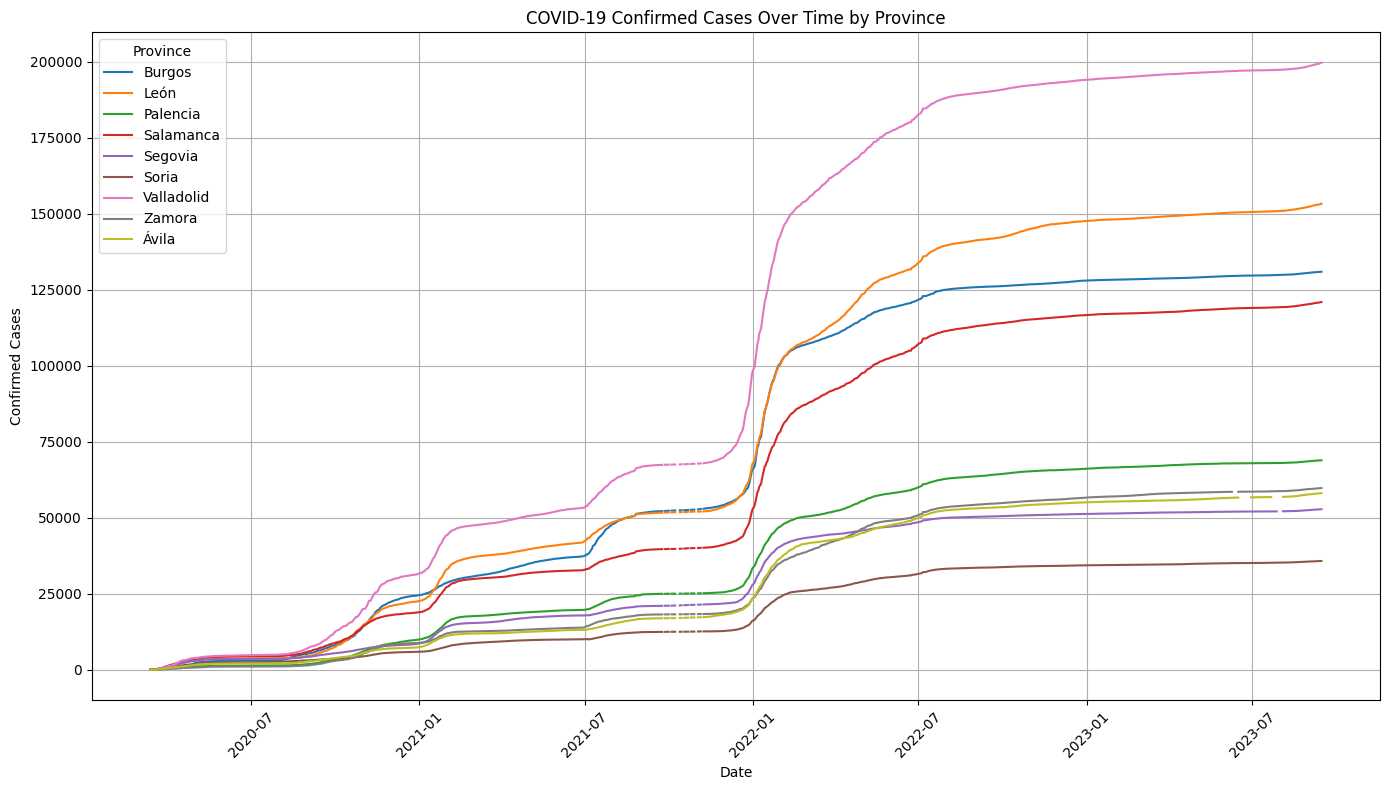

In [15]:
pivot_df = df.pivot(index='fecha', columns='provincia', values='casos_confirmados')

# Plot the data
plt.figure(figsize=(14, 8))
for province in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[province], label=province)

plt.title('COVID-19 Confirmed Cases Over Time by Province')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend(title='Province', loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()